In [1]:
# coding: utf-8
import sys, os
from PIL import Image
import pywt
import numpy as np

In [2]:
filename = sys.argv[1]
LEVEL = len(sys.argv) > 2 and int(sys.argv[2]) or 3
WAVLET = len(sys.argv) > 3 and sys.argv[3] or "db1"

ValueError: invalid literal for int() with base 10: 'C:\\Users\\TakaiYohei\\AppData\\Roaming\\jupyter\\runtime\\kernel-ab67d9c7-eca6-4b34-8c60-e8b9fff297f5.json'

In [7]:
def merge_images(cA, cH_V_D):
    """numpy.array を ４つ(左上、(右上、左下、右下))くっつける"""
    cH, cV, cD = cH_V_D
    print (cA.shape, cH.shape, cV.shape, cD.shape)
    cA = cA[0:cH.shape[0], 0:cV.shape[1]] # 元画像が2の累乗でない場合、端数ができることがあるので、サイズを合わせる。小さい方に合わせます。
    return numpy.vstack((numpy.hstack((cA,cH)), numpy.hstack((cV, cD)))) # 左上、右上、左下、右下、で画素をくっつける

In [4]:
def create_image(ary):
    """numpy.array を Grayscale画像に変換する"""
    newim = Image.new("L", ary.shape)
    newim.putdata(ary.flatten())
    return newim

In [5]:
def wavlet_transform_to_image(gray_image, level, wavlet="db1", mode="sym"):
    """gray画像をlevel階層分Wavelet変換して、各段階を画像表現で返す

    return [復元レベル０の画像, 復元レベル１の画像,... , 復元レベル<level-1>の画像, 各2D係数を１枚の画像にした画像]
    """
    ret = []
    data = numpy.array(list(gray_image.getdata()), dtype=numpy.float64).reshape(gray_image.size)
    images = pywt.wavedec2(data, wavlet, level=level, mode=mode) # http://www.pybytes.com/pywavelets/ref/2d-dwt-and-idwt.html
    for i in range(2, len(images)+1): # 部分的に復元して ret に詰める
        ary = pywt.waverec2(images[0:i], WAVLET)  * 2**(i-1) / 2**level # 部分的に復元すると加算されていた値が戻らない(白っぽくなってしまう)ので調整
        ret.append(create_image(ary))
    # 各2D係数を１枚の画像にする
    merge = images[0] / (2**level) # cA の 部分は値が加算されていくので、画像表示のため平均をとる
    for i in range(1, len(images)): 
        merge = merge_images(merge, images[i]) # ４つの画像を合わせていく
    ret.append(create_image(merge))
    return ret

In [68]:
if __name__ == "__main__":
    #im = Image.open(filename)
    im = left
    left = np.array(left).astype(np.float32)
    if im.size[0] != im.size[1]: # 縦横サイズが同じじゃないとなんか上手くいかないので、とりあえず合わせておく
        max_size = max(im.size)
        newim = Image.new(im.mode, (max_size, max_size))
        newim.paste(im, (0,0))
        im = newim

    im.getdata() # これを呼んでおかないと何故か次の split() が失敗する・・・？なぜ？
    bands = im.split() # RGBの各チャネル毎に処理をする
    converted_bands_array = [wavlet_transform_to_image(gray, LEVEL, wavlet=WAVLET) for gray in bands] # 各RGBチャネル毎に変換
    # zip(*hoge) がわかりにくいけど、 converted_bands には (R,G,B)の画像(PIL.Image)が入る. mergeでRGB画像に復元
    converted_array = [Image.merge(im.mode, converted_bands) for converted_bands in zip(*converted_bands_array)]

    # converted_array: [復元レベル０の画像, 復元レベル１の画像,... , 復元レベル<level-1>の画像, 各2D係数を１枚の画像にした画像]
    for i, img in enumerate(converted_array): 
        img.save("%s_%d.png" % (filename, i)) # 適当に画像出力

AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [8]:
w = pywt.Wavelet('db3')

In [9]:
print(w)

Wavelet db3
  Family name:    Daubechies
  Short name:     db
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [10]:
x = [3, 7, 1, 1, -2, 5, 4, 6]
cA, cD = pywt.dwt(x, 'db2')

In [11]:
x

[3, 7, 1, 1, -2, 5, 4, 6]

In [12]:
cA, cD

(array([ 5.65685425,  7.39923721,  0.22414387,  3.33677403,  7.77817459]),
 array([-2.44948974, -1.60368225, -4.44140056, -0.41361256,  1.22474487]))

In [65]:
# -*- coding: utf-8 -*-
from scipy.io.wavfile import read

os.chdir("C:\\Users\\TakaiYohei\\Desktop")

wavfile = "【モバマス】我那覇響ボイス集.wav"

fs, data = read(wavfile)

print ("Sampling rate :", fs)

if (data.shape[1] == 2):
    left = data[:, 0]
    right = data[:, 1]

Sampling rate : 44100


In [66]:
left

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [22]:
cA, cD = pywt.dwt(left, 'db2')

In [43]:
list = np.array(range(1, len(left)+1))
len(list)

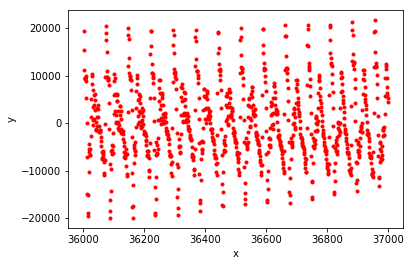

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Create some random numbers
x = list[36000:37000]
y = left[36000:37000]

# 散布図 を 確認
fig1 = plt.figure()
plt.plot(x,y,'.r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

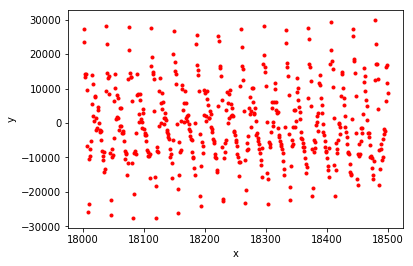

In [58]:
list2 = np.array(range(1, len(cA)+1))
len(list2)

x = list2[18000:18500]
y = cA[18000:18500]

# 散布図 を 確認
fig1 = plt.figure()
plt.plot(x,y,'.r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

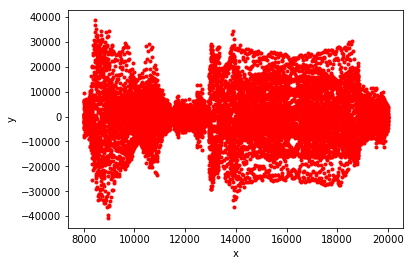

In [52]:
list3 = np.array(range(1, len(cD)+1))
len(list3)

x = list3[8000:20000]
y = cA[8000:20000]

# print(x)
# print(y)

# 散布図 を 確認
fig1 = plt.figure()
plt.plot(x,y,'.r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()